In [1]:
pip install yfinance pandas numpy matplotlib talib pandas_ta

ERROR: Could not find a version that satisfies the requirement talib (from versions: none)
ERROR: No matching distribution found for talib
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_ta as ta
import yfinance as yf

In [3]:
ticker = 'AAPL'

data = yf.download(ticker,
start= '2020-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876099,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167595,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742653,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400536,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565193,132079200


In [5]:
# Calculate the RSI (14-period)
data['RSI'] = ta.rsi(data['Close'], length=14)

In [6]:
# Calculate Bollinger Bands (20-period, 2 standard deviations)
bollinger = ta.bbands(data['Close'], length=20, std=2)
data = pd.concat([data, bollinger], axis=1)  # Add to the dataframe

In [7]:
# Calculate the MACD (default: 12, 26, 9)
macd = ta.macd(data['Close'])
data = pd.concat([data, macd], axis=1)

In [8]:
# Calculate the EMA (50-period and 200-period for trend analysis)
data['EMA_50'] = ta.ema(data['Close'], length=50)
data['EMA_200'] = ta.ema(data['Close'], length=200)

In [9]:
# Download VIX data used to check fear index
vix_data = yf.download('^VIX', start='2020-01-01', end='2023-01-01')


[*********************100%***********************]  1 of 1 completed


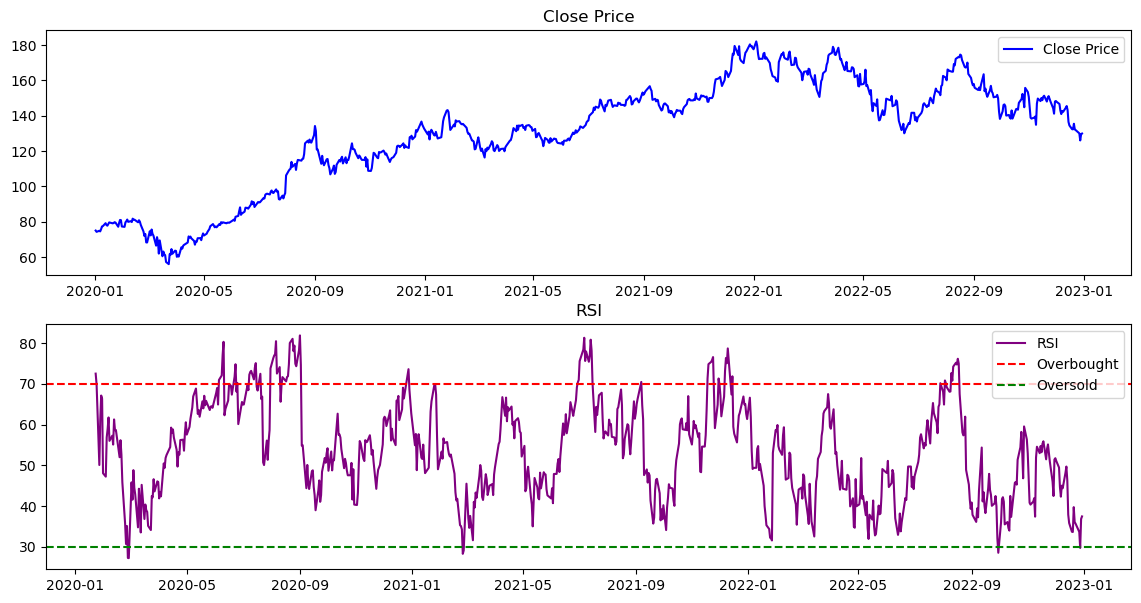

In [10]:
plt.figure(figsize=(14,7))

# Price chart
plt.subplot(2, 1, 1)
plt.plot(data['Close'], label='Close Price', color='blue')
plt.title('Close Price')
plt.legend()

# RSI chart
plt.subplot(2, 1, 2)
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title('RSI')
plt.legend()

plt.show()

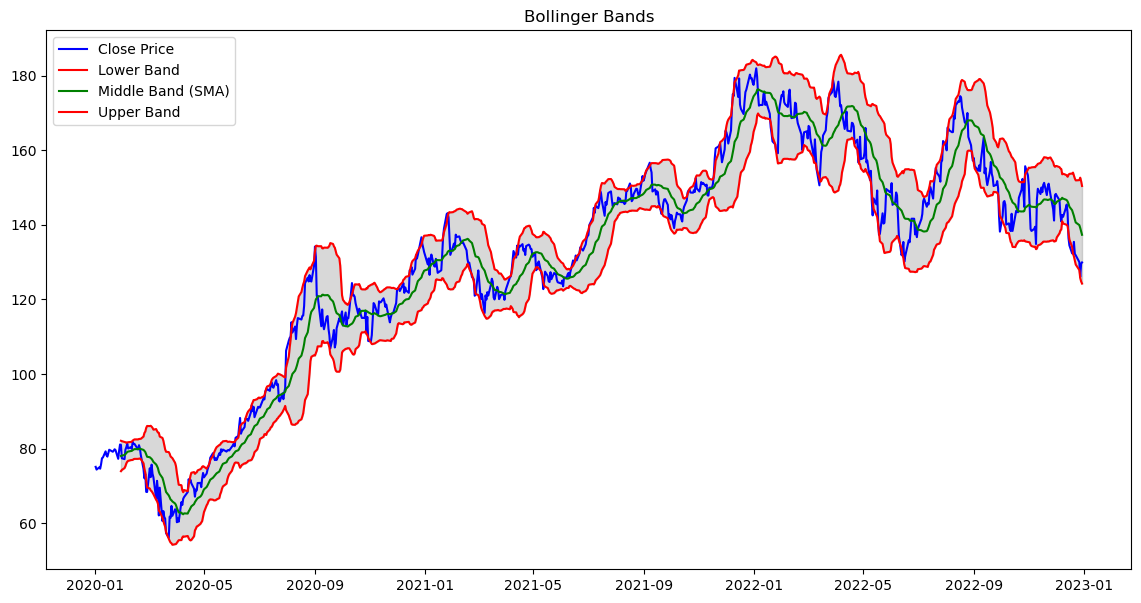

In [12]:
#plot bollinger bands 
plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['BBL_20_2.0'], label='Lower Band', color='red')
plt.plot(data['BBM_20_2.0'], label='Middle Band (SMA)', color='green')
plt.plot(data['BBU_20_2.0'], label='Upper Band', color='red')
plt.fill_between(data.index, data['BBL_20_2.0'], data['BBU_20_2.0'], color='gray', alpha=0.3)
plt.title('Bollinger Bands')
plt.legend()
plt.show()

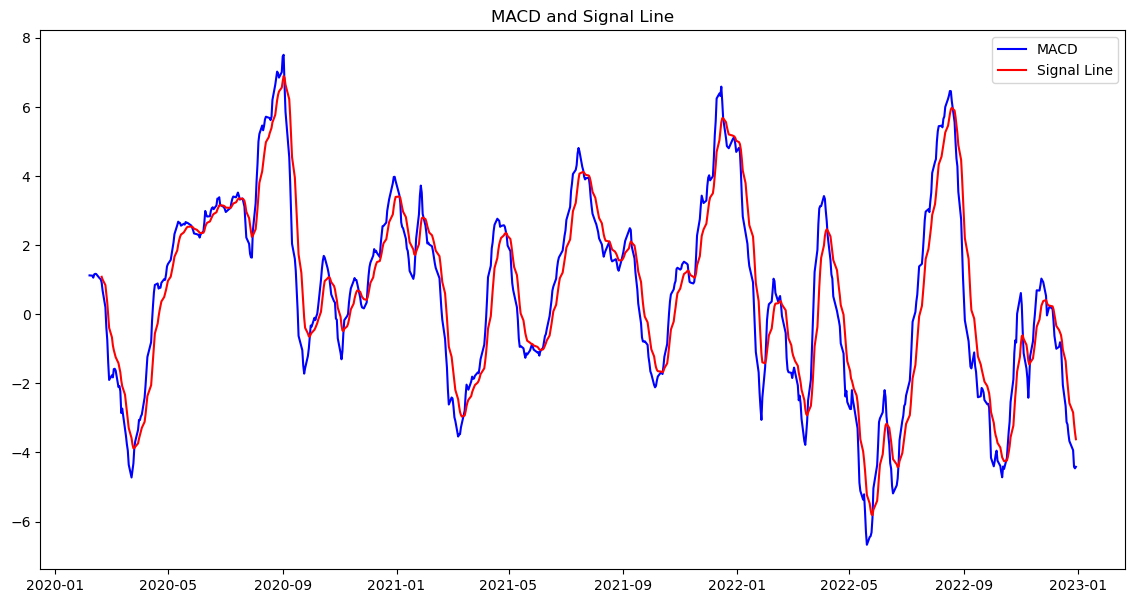

In [13]:
#plot MACD indicator
plt.figure(figsize=(14,7))
plt.plot(data['MACD_12_26_9'], label='MACD', color='blue')
plt.plot(data['MACDs_12_26_9'], label='Signal Line', color='red')
plt.title('MACD and Signal Line')
plt.legend()
plt.show()

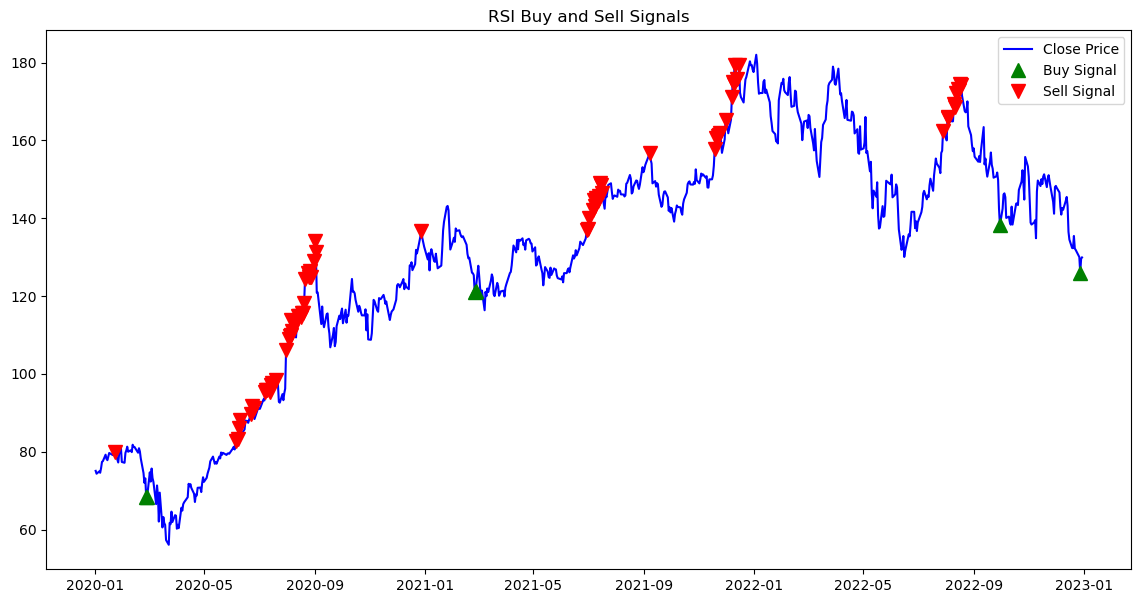

In [14]:
# example trading strategy, adjust if necessary: Buy when RSI < 30, Sell when RSI > 70
data['Buy_Signal'] = (data['RSI'] < 30)
data['Sell_Signal'] = (data['RSI'] > 70)

# Plot Buy and Sell signals
plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data[data['Buy_Signal']]['Close'], marker='^', markersize=10, color='green', label='Buy Signal', linestyle='None')
plt.plot(data[data['Sell_Signal']]['Close'], marker='v', markersize=10, color='red', label='Sell Signal', linestyle='None')
plt.title('RSI Buy and Sell Signals')
plt.legend()
plt.show()